# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

SAT = pd.read_csv('/Users/jonathanbeatty/DSI-US-5/project-1/data/sat.csv')
ACT = pd.read_csv('/Users/jonathanbeatty/DSI-US-5/project-1/data/act.csv')

In [706]:
SAT.head()
SAT.set_index('State', inplace= True)

In [707]:
ACT.set_index('State', inplace= True)

##### 2. Print the first ten rows of each dataframe.

In [708]:
SAT.head(10)

,Unnamed: 0,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,,
Alabama,0,5%,593,572,1165
Alaska,1,38%,547,533,1080
Arizona,2,30%,563,553,1116
Arkansas,3,3%,614,594,1208
California,4,53%,531,524,1055
Colorado,5,11%,606,595,1201
Connecticut,6,100%,530,512,1041
Delaware,7,100%,503,492,996
District of Columbia,8,100%,482,468,950


In [709]:
ACT.head(10)

,Unnamed: 0,Participation,English,Math,Reading,Science,Composite
State,,,,,,,
National,0,60%,20.3,20.7,21.4,21.0,21.0
Alabama,1,100%,18.9,18.4,19.7,19.4,19.2
Alaska,2,65%,18.7,19.8,20.4,19.9,19.8
Arizona,3,62%,18.6,19.8,20.1,19.8,19.7
Arkansas,4,100%,18.9,19.0,19.7,19.5,19.4
California,5,31%,22.5,22.7,23.1,22.2,22.8
Colorado,6,100%,20.1,20.3,21.2,20.9,20.8
Connecticut,7,31%,25.5,24.6,25.6,24.6,25.2
Delaware,8,18%,24.1,23.4,24.8,23.6,24.1


##### 3. Describe in words what each variable (column) is.

In the SAT dataframe the for column "Unnamed:0" is a index column for the states. The "State" column contains all the states in aplhabetical order. The "Participation" column contains the corresponding participation % of the staes based on the total amount of seniors in the state. The "EBRW" column represents the average scores of the Reading and writing section for all students who took the SAT in the corresponding states. The "Math" column represents the average scores of the Math section of the SAT for all students who took the SAT in the corresponding state.

In the ACT dataframe the firs column "Unnamed:" is an index of the rown from 0-50. The "State" column contains the states in alphabetical order with a new National row that isnt present in the SAT data. The "Participation" column refers to the % of the high school senior population who took the ACT in the given state. The following four columns each refer to the average of a specific area of the ACT for the total amount of students who took the ACT in the state. The last column "composite" referes to the average of the four sections before, rounded to the nearest whole number, for the population of students who took the ACT in the state.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The data looks like its complete with all columns having the correct amount of non null variables in them. The first column in both dataframes is extra and unnecessary. The other obvious issue is that 2 of our columns in both dataframes are object types instead of int or float. Below I remove the execess Unnamed: 0 column and also set the index as State earlier to make merging the dataframes easier.

In [710]:
ACT = ACT.drop(['Unnamed: 0'], axis = 1)
SAT = SAT.drop(['Unnamed: 0'], axis = 1)

In [711]:
ACT['Participation'] = ACT['Participation'].map(lambda part_cell: part_cell.replace('%', ''))
SAT['Participation'] = SAT['Participation'].map(lambda part_cell: part_cell.replace('%', ''))
ACT['Participation'] = ACT['Participation'].map(lambda part_cell: float(part_cell))
#df['Participation'] 

In [712]:
ACT.head()

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,60.0,20.3,20.7,21.4,21.0,21.0
Alabama,100.0,18.9,18.4,19.7,19.4,19.2
Alaska,65.0,18.7,19.8,20.4,19.9,19.8
Arizona,62.0,18.6,19.8,20.1,19.8,19.7
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


##### 5. Print the types of each column.

In [713]:
ACT.dtypes

Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [714]:
SAT.dtypes

Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

Yes, state and participation in both dataframes need to be reassigned. State can be reassigned like the index like I did earlier and participation needs to be converted to a float.

In [766]:
ACT['Participation'] = ACT['Participation'].map(lambda part_cell: float(part_cell))
SAT['Participation'] = SAT['Participation'].map(lambda part_cell: float(part_cell))

ACT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, National to Wyoming
Data columns (total 6 columns):
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6)
memory usage: 5.3+ KB


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [716]:
SAT_columns = ['Total','Math','Evidence-Based Reading and Writing', 'Participation'] 
ACT_columns = ['Composite', 'Math','Reading', 'Science', 'English']               
SAT_dicts = [SAT[s].to_dict() for s in SAT_columns]  
ACT_dicts = [ACT[a].to_dict() for a in ACT_columns]
#not sure if i did exactly what was asked but we are generating some dictionaries!!!

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [765]:

new_dict =  {key: value for (key, value) in SAT.items()}
#This has created a new dictionary but not sure if its the right one haha

new_dict

{'Participation': State
 Alabama                   5.0
 Alaska                   38.0
 Arizona                  30.0
 Arkansas                  3.0
 California               53.0
 Colorado                 11.0
 Connecticut             100.0
 Delaware                100.0
 District of Columbia    100.0
 Florida                  83.0
 Georgia                  61.0
 Hawaii                   55.0
 Idaho                    93.0
 Illinois                  9.0
 Indiana                  63.0
 Iowa                      2.0
 Kansas                    4.0
 Kentucky                  4.0
 Louisiana                 4.0
 Maine                    95.0
 Maryland                 69.0
 Massachusetts            76.0
 Michigan                100.0
 Minnesota                 3.0
 Mississippi               2.0
 Missouri                  3.0
 Montana                  10.0
 Nebraska                  3.0
 Nevada                   26.0
 New Hampshire            96.0
 New Jersey               70.0
 New Mexico    

##### 9. Merge the dataframes on the state column.

In [718]:
frames = [ACT, SAT]
df = pd.concat(frames, axis =1, sort = True)
df.head

<bound method NDFrame.head of                       Participation  English  Math  Reading  Science  \
Alabama                       100.0     18.9  18.4     19.7     19.4   
Alaska                         65.0     18.7  19.8     20.4     19.9   
Arizona                        62.0     18.6  19.8     20.1     19.8   
Arkansas                      100.0     18.9  19.0     19.7     19.5   
California                     31.0     22.5  22.7     23.1     22.2   
Colorado                      100.0     20.1  20.3     21.2     20.9   
Connecticut                    31.0     25.5  24.6     25.6     24.6   
Delaware                       18.0     24.1  23.4     24.8     23.6   
District of Columbia           32.0     24.4  23.5     24.9     23.5   
Florida                        73.0     19.0  19.4     21.0     19.4   
Georgia                        55.0     21.0  20.9     22.0     21.3   
Hawaii                         90.0     17.8  19.2     19.2     19.3   
Idaho                          38.

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [719]:
# new_columns_dict = {
#         'Participation':'ACT_Participation',
#         'English':'ACT_English',
#         'Evidence-Based Reading and Writing':'SAT_EBRW',
#         'Math':'ACT_Math',
#         'Reading':'ACT_Reading',
#         'Science':'ACT_Science',
#         'Composite':'ACT_Composite',
#         'Participation':'SAT_Participation',
#         'Evidence-Based Reading and Writing':'SAT_EBRW',
#         'Math':'SAT_Math',
#         'Total':'SAT_Total',
#     }

new_columns_list = ['ACT_Participation', 'ACT_English', 'ACT_Math',
       'ACT_Reading', 'ACT_Science', 'ACT_Composite',
       'SAT_Participation', 'SAT_EBRW', 'SAT_Math', 'SAT_Total',
       ]

In [720]:
df.columns = new_columns_list
df

,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0
Colorado,100.0,20.1,20.3,21.2,20.9,20.8,11.0,606.0,595.0,1201.0
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [721]:
df.max(axis=0)

ACT_Participation     100.0
ACT_English            25.5
ACT_Math               25.3
ACT_Reading            26.0
ACT_Science            24.9
ACT_Composite          25.5
SAT_Participation     100.0
SAT_EBRW              644.0
SAT_Math              651.0
SAT_Total            1295.0
dtype: float64

In [722]:
df.min(axis=0)

ACT_Participation      8.0
ACT_English           16.3
ACT_Math              18.0
ACT_Reading           18.1
ACT_Science            2.3
ACT_Composite         17.8
SAT_Participation      2.0
SAT_EBRW             482.0
SAT_Math              52.0
SAT_Total            950.0
dtype: float64

##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [723]:
df.dropna(subset=['SAT_Participation'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
ACT_Participation    51 non-null float64
ACT_English          51 non-null float64
ACT_Math             51 non-null float64
ACT_Reading          51 non-null float64
ACT_Science          51 non-null float64
ACT_Composite        51 non-null float64
SAT_Participation    51 non-null float64
SAT_EBRW             51 non-null float64
SAT_Math             51 non-null float64
SAT_Total            51 non-null float64
dtypes: float64(10)
memory usage: 4.4+ KB


In [724]:
np.std(df['ACT_Composite'])

2.000786081581989

In [725]:
def calc_std(x):
    n = len(x)
    mu = np.mean(x)
    sd = []
    st_dev = (1/n) * sum([((each - mu) ** 2) for each in x])#need to remeber to write this in code very simliar to the way its written in writing
    return st_dev ** 0.5  
sd.append(calc_std(df['SAT_Participation']))
    
calc_std(df['SAT_Participation'])

34.92907076664508

In [726]:
sd

[31.524950201500726,
 2.3095985716418723,
 1.9446292295028094,
 2.0288771415788838,
 3.1206668182509554,
 1.9827389384951442,
 nan,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508,
 34.92907076664508]

## Step 2: Manipulate the dataframe


##### 13. Turn the list `sd` into a new observation in your dataset.

In [727]:
# don't

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [728]:
df_1 = df[['SAT_Participation', 'SAT_Total', 'ACT_Participation', 'ACT_Composite']]
df_2 = df_1.sort_values('SAT_Participation', ascending=False)

In [729]:
df.sort_values('SAT_Participation', ascending=False).head(29)
#df.sort_values('ACT_Participation', ascending=True).head(20)


,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total
District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482.0,468.0,950.0
Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509.0,495.0,1005.0
Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530.0,512.0,1041.0
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513.0,493.0,1005.0
Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520.0,497.0,1017.0
Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555.0,551.0,1107.0
Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [730]:
SAT_part_gt_50 = df['SAT_Participation'] < 20
ACT_part_gt_50 = df['ACT_Composite'] > 21
ACT_part_lt_100 = df['ACT_Participation'] <80
df[SAT_part_gt_50 & ACT_part_gt_50 & ACT_part_lt_100]


,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total
Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641.0,635.0,1275.0
Kansas,73.0,21.1,21.3,22.3,21.7,21.7,4.0,632.0,628.0,1260.0
Ohio,75.0,21.2,21.6,22.5,22.0,22.0,12.0,578.0,570.0,1149.0


## Step 3: Visualize the data

In [731]:
df.describe()

,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

65.25490196078431

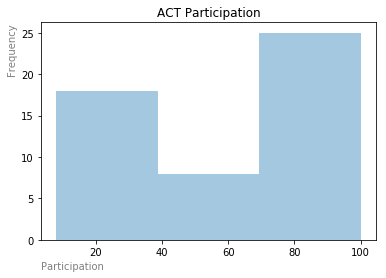

In [732]:
sns.distplot(df.ACT_Participation, kde = False)
plt.title('ACT Participation')
plt.xlabel("Participation", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Frequency", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
np.mean(df['ACT_Participation'])

Text(0.5,1,'SAT Participation 2017')

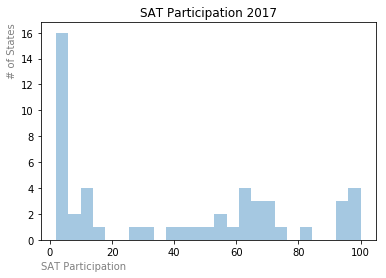

In [733]:
sns.distplot(df.SAT_Participation, bins = 25, kde = False)
plt.xlabel("SAT Participation", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("# of States", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
plt.title('SAT Participation 2017')

##### 17. Plot the Math(s) distributions from both data sets.

Text(0.5,1,'ACT Math Scores')

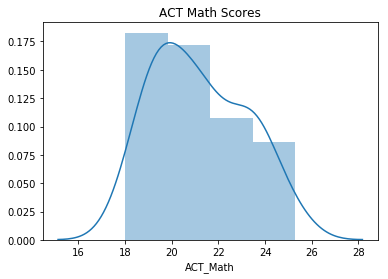

In [734]:
sns.distplot(df.ACT_Math)
plt.title('ACT Math Scores')

Text(0.5,1,'SAT Math Scores')

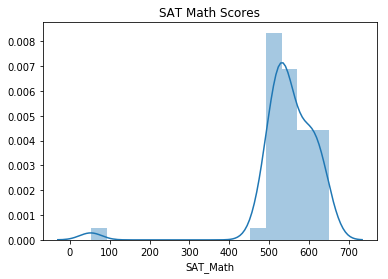

In [735]:
sns.distplot(df.SAT_Math)
plt.title('SAT Math Scores')

##### 18. Plot the Verbal distributions from both data sets.

Text(0.5,1,'ACT English Scores')

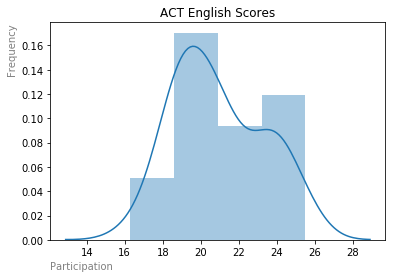

In [736]:
sns.distplot(df.ACT_English)
plt.xlabel("Participation", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Frequency", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
plt.title('ACT English Scores')

Text(0.5,1,'ACT Science Scores')

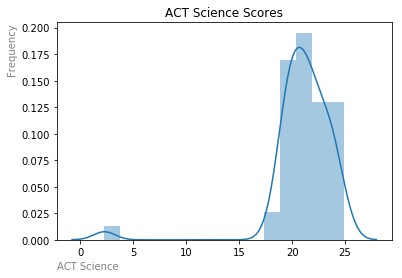

In [737]:
sns.distplot(df.ACT_Science)
plt.xlabel("ACT Science", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Frequency", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
plt.title('ACT Science Scores')

Text(0.5,1,'ACT Reading Scores')

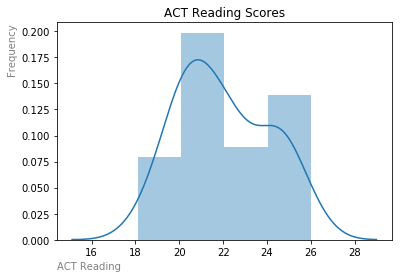

In [738]:
sns.distplot(df.ACT_Reading)
plt.xlabel("ACT Reading", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Frequency", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
plt.title('ACT Reading Scores')

Text(0.5,1,'SAT EBRW(Verbal) Scores')

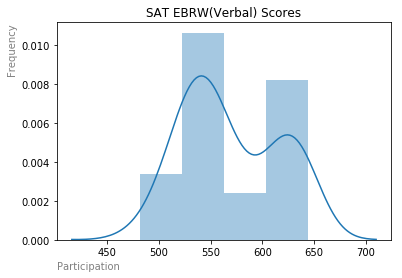

In [739]:
sns.distplot(df.SAT_EBRW)
plt.xlabel("Participation", position = (0,0), ha = 'left', color = 'grey') # (x,y)
plt.ylabel("Frequency", position = (0, 1), ha = 'right', color = 'grey') # (x,y)
plt.title('SAT EBRW(Verbal) Scores')

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

The most common assumption is that the sampling data and/or the population is normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

It holds true for most columns however there are serious outliers in ACT Science scores as well as SAT Math scores that are throwing a large skew.

##### 21. Plot some scatterplots examining relationships between all variables.

Text(0.5,1,'ACT Composite and SAT Total Correlation')

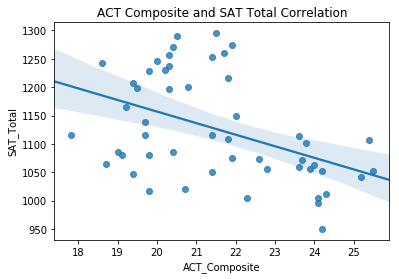

In [740]:
sns.regplot(df['ACT_Composite'],df['SAT_Total'])
plt.title('ACT Composite and SAT Total Correlation')

Text(0.5,1,'ACT Composite and SAT Participation Correlation')

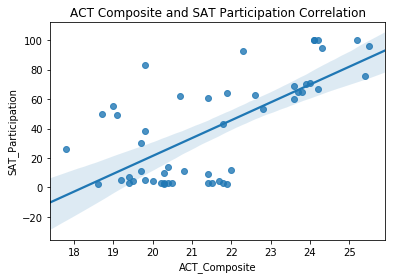

In [741]:
sns.regplot(df['ACT_Composite'],df['SAT_Participation'])
plt.title('ACT Composite and SAT Participation Correlation')

Text(0.5,1,'ACT Participation and SAT Total Correlation')

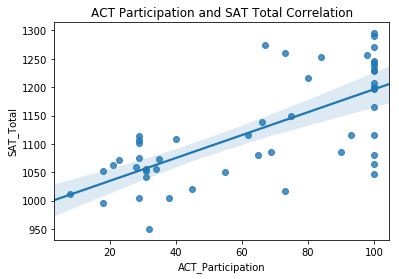

In [742]:
sns.regplot(df['ACT_Participation'],df['SAT_Total'])
plt.title('ACT Participation and SAT Total Correlation')

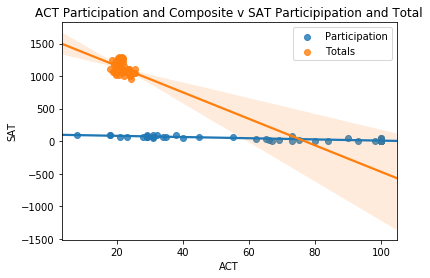

<Figure size 1080x1080 with 0 Axes>

In [743]:
sns.regplot(df['ACT_Participation'], df['SAT_Participation'], label='Participation')
sns.regplot(df['ACT_Composite'], df['SAT_Total'], label='Totals')
plt.title('ACT Participation and Composite v SAT Participipation and Total')
plt.xlabel('ACT')
plt.ylabel('SAT')
plt.legend()
plt.show()
fig = plt.figure(figsize=(15, 15));

Text(0.5,1,'ACT and SAT Participation')

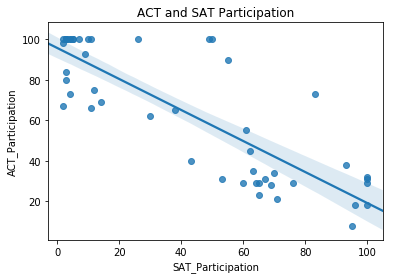

In [744]:
sns.regplot(x=df['SAT_Participation'],
            y=df['ACT_Participation'])
plt.title('ACT and SAT Participation')


Text(0.5,1,'ACT Participation and ACT Composite Correlation')

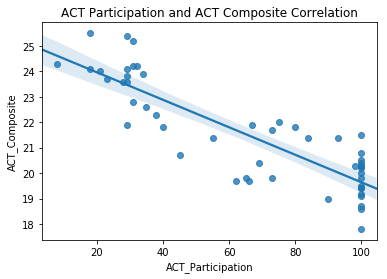

In [745]:
sns.regplot(df['ACT_Participation'],df['ACT_Composite'])
plt.title('ACT Participation and ACT Composite Correlation')

Text(0.5,1,'SAT Participation and SAT Total Correlation')

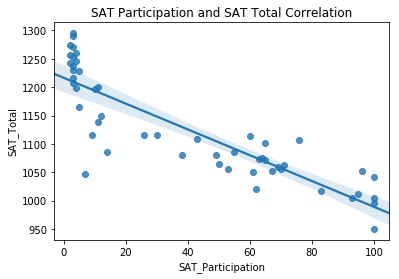

In [746]:
sns.regplot(df['SAT_Participation'],df['SAT_Total'])
plt.title('SAT Participation and SAT Total Correlation')

Text(0.5,1,'SAT Math and ACT Math Correlation')

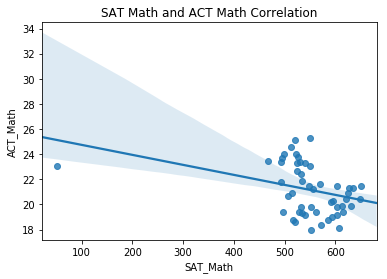

In [747]:
sns.regplot(df['SAT_Math'],df['ACT_Math'])
plt.title('SAT Math and ACT Math Correlation')

Text(0.5,1,'SAT Verbal and ACT English Correlation')

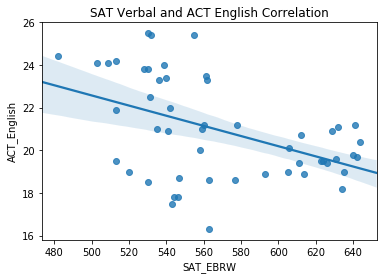

In [748]:
sns.regplot(df['SAT_EBRW'],df['ACT_English'])
plt.title('SAT Verbal and ACT English Correlation')

##### 22. Are there any interesting relationships to note?

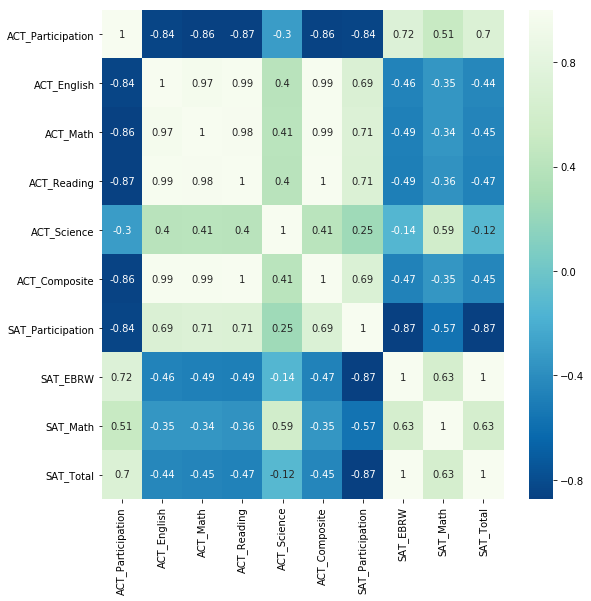

In [749]:
plt.figure(figsize =(9,9))
sns.heatmap(df.corr(), cmap="GnBu_r", annot = True)
#This heatmap is displaying the sorrelated values between -1 and 1 of each column in the dataframe.
#Im using this to infer the information below

1. There is a very strong negative correlation between ACT participation and SAT participation.#close to -1
2. There is a very strong negative correlation between ACT participation and ACT composite scores.
3. There is a very strong negative correlation between SAT participation and SAT total scores.
4. There is very little correlation between the indivdual sections of each test(Math, Verbal etc.).# close to 0
5. There is a strong positive correlation between ACT Composite scores as well as individula scores and SAT participation due to the fact that states with higher SAT participation have lower ACT participation which leads to higher scores with a smaller sample.



##### 23. Create box plots for each variable. 

Text(0.5,1,'ACT Composite Scores')

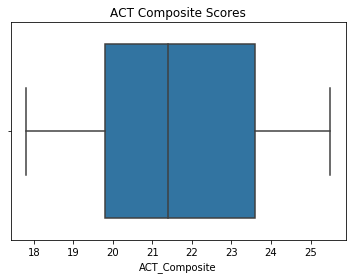

In [750]:
sns.boxplot(df.ACT_Composite)
plt.title('ACT Composite Scores')

Text(0.5,1,'SAT Math Scores')

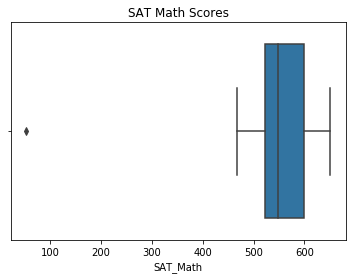

In [751]:
sns.boxplot(df.SAT_Math)#MASSIVE OUTLIER
plt.title('SAT Math Scores')

Text(0.5,1,'SAT Total Scores')

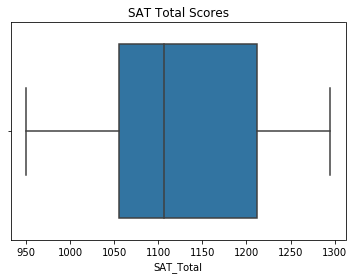

In [752]:
sns.boxplot(df.SAT_Total)
plt.title('SAT Total Scores')

Text(0.5,1,'ACT English Scores')

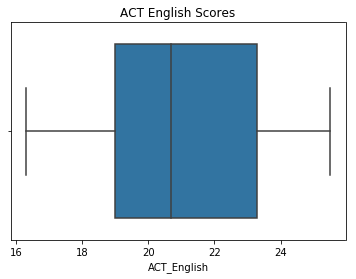

In [753]:
sns.boxplot(df.ACT_English)
plt.title('ACT English Scores')

Text(0.5,1,'ACT Science Scores')

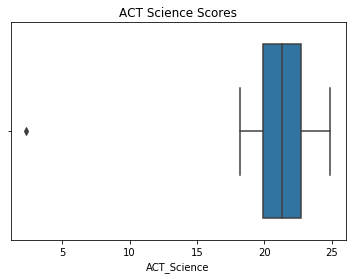

In [754]:
sns.boxplot(df.ACT_Science)
plt.title('ACT Science Scores')

Text(0.5,1,'ACT Reading Scores')

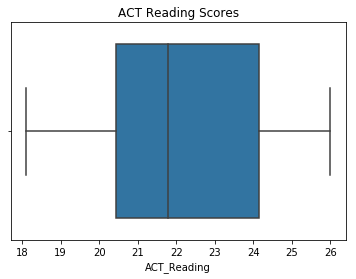

In [755]:
sns.boxplot(df.ACT_Reading)
plt.title('ACT Reading Scores')

Text(0.5,1,'ACT Math Scores')

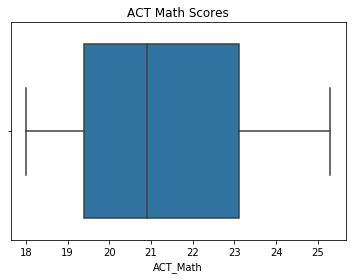

In [756]:
sns.boxplot(df.ACT_Math)
plt.title('ACT Math Scores')

Text(0.5,1,'ACT Composite Scores')

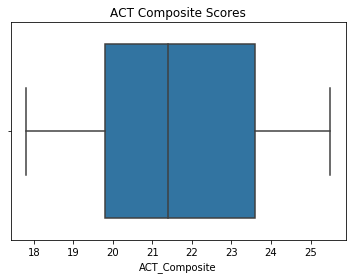

In [757]:
sns.boxplot(df.ACT_Composite)
plt.title('ACT Composite Scores')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

In [758]:
df.describe()

,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_EBRW,SAT_Math,SAT_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


ACT_Participation:
    1. The measure of center or mean of the distribution is 65.25
    2. The measure of spread or Standard Deviation is 32.14
    3. The measure of shape is Normal but negatively skewed.#Tail of the distribution leans to the left
SAT_Participation:
    1. The measure of center of the distribuiton is 39.80
    2. The measure of spread or Standard Deviation is 35.27#This is a very large spread due to the large variation in participation per state
    3. The measure of shape is Normal but positively skewed.#Tail of distribution leans to the right
ACT_Math:
    1. The measure of center or mean of the distribution is 21.18
    2. The measure of spread or Standard Deviation is 1.98
    3. The measure of shape is Normal but positively skewed.
SAT_Math:
    1. The measure of center or mean of the distribution is 547.63
    2. The measure of spread or Standard Deviation is 84.91#This is exceedingly high due the the outlier of the score 52 throwing the std dev off
    3. The measure of shape heavily negatively skewed.
ACT_English:
    1. The measure of center or mean of the distribution is 20.93
    2. The measure of spread or Standard Deviation is 2.35
    3. The measure of shape is Normal but positively skewed.
ACT_Science:
    1. The measure of center or mean of the distribution is 21.04
    2. The measure of spread or Standard Deviation is 3.18#Exceedingly high due to a massive outlier of 2.3 score
    3. The measure of shape heavily negatively skewed.
ACT_Reading:
    1. The measure of center or mean of the distribution is 22.01
    2. The measure of spread or Standard Deviation is 2.07
    3. The measure of shape is Normal with a slight positive skew.
SAT_ERBW:
    1. The measure of center or mean of the distribution is 569.12
    2. The measure of spread or Standard Deviation is 45.67
    3. The measure of shape is Normal with a slight positive skew.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

1. There is a very strong negative correlation between ACT participation and SAT participation.#close to -1
2. There is a strong negative correlation between ACT participation and ACT composite scores.
3. There is a very strong negative correlation between SAT participation and SAT total scores.
4. There is very little correlation between the indivdual sections of each test(Math, Verbal etc.).# close to 0

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [759]:
result = stats.ttest_ind(df['ACT_Participation'], df['SAT_Participation'])
result
t_stat, p_value = result

t_stat, p_value

(3.8085778908170544, 0.00024134203698662353)

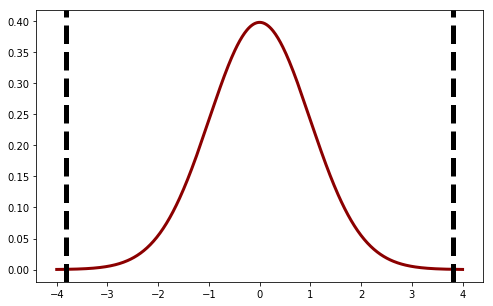

In [760]:
xpoints = np.linspace(4, -4, 500)
ypoints = stats.t.pdf(xpoints,
                      len(df['ACT_Participation'])+len(df['SAT_Participation'])-2,
                      0, 1)
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure.
ax = fig.gca()

# Plot the lines using `matplotlib`'s plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# Plot a vertical line for our measured difference in rates' t-statistic.
ax.axvline(t_stat, color='black', linestyle='--', lw=5)
ax.axvline(-t_stat, color='black', linestyle='--', lw=5)

plt.savefig('P_Value.pdf')

In [761]:
t_stat, p_value

(3.8085778908170544, 0.00024134203698662353)

Our p_value comes out to .0002. Using the principle that our probability value is less than our alpha we can reject the null value hypothisis. Something statistically important is happening here. There is a direct relationship between these 2 variables. This basically says that theres a 99.9998% chance to see a value below or above the t statistic in our distribution. 

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [762]:
n = df.shape[0]
mean_part_act = np.mean(df['ACT_Participation'])
mean_part_sat = np.mean(df['SAT_Participation'])

standard_error_ACT = np.std(df['ACT_Participation'], ddof=1)/np.sqrt(n)
standard_error_SAT = np.std(df['SAT_Participation'], ddof=1)/np.sqrt(n)

z = 1.96
ci_lower_ACT = mean_part_act - z*standard_error_ACT
ci_lower_SAT = mean_part_sat - z*standard_error_SAT
ci_upper_ACT = mean_part_act + z*standard_error_ACT
ci_upper_SAT = mean_part_sat + z*standard_error_SAT
ci_lower_SAT, ci_upper_SAT
49.48576602608615 - 30.122077111168757

19.36368891491739

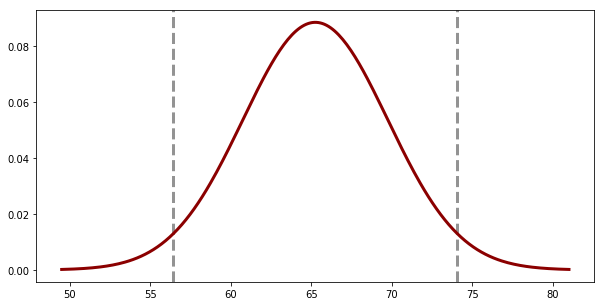

In [763]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(mean_part_act-3.5*standard_error_ACT,
                 mean_part_act+3.5*standard_error_ACT, 250)#number of points im creating, increase to smooth out plot)

Z = stats.norm(mean_part_act, standard_error_ACT)
zy = Z.pdf(zx)#calculate the pdf for zx

ax.axvline(mean_part_act-1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(mean_part_act+1.96*standard_error_ACT, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

ax.plot(zx, zy, linewidth=3, color='darkred')

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

This was not surprising considering what the graph from 26 looked like. We are 5% confident that the mean of ACT Participation falls in between 58.96 and 71.55. If the lines continued to move out to 99.9998(or the pvalue) we would be 99.9998% confident that the mean falls between an even wider set of numbers. 

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No because the values are only relating to their respective tests. Theres very little statistical information that is useful to compare these two values because they are based off a different grading system.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

No because we dont have a proper sample of the population total. To conclude anything with more statistical certainty would mean going over alot more data in targeted areas of states.